# Visualizing Data

> To find signals in data, we must learn to reduce the noise - not just the noise that resides in the data, but also the noise that resides in us. It is nearly impossible for noisy minds to perceive anything but noise in data.
>
> \- Stephen Few, Data Visualization Consultant and Author

## Applied Review

### Joining Data

- *Joining* is the process of combining two DataFrames to form a new DataFrame that incorporates data from both of the combined tables.

- The most common type of join is an *inner join*, but full-outer, left-outer, and right-outer joins are all useful as well.

- Joins are done in Pandas with the `pd.merge` function.

### Exporting Data

- Most types of data in Python, including DataFrames and trained models, can be saved in files.

- The most common types of files for this are CSVs, JSON, and pickle files.

## Matplotlib and Seaborn

### Matplotlib

The most tried-and-true, mature plotting library in Python is called Matplotlib.
It began with a mission of replicating Matlab's plotting functionality in Python, so if you're familiar with Matlab you may notice some syntactic similiaries.

Matplotlib is traditionally imported like this:
```python
import matplotlib.pyplot as plt
```

This means *import matplotlib's pyplot submodule under the name `plt`*.

For Matplotlib to work within Jupyter notebooks, we need to add an additional command:
```python
%matplotlib inline
```

This tells Jupyter to display any Matplotlib plots that are generated.
**Without this line, your plots won't show up -- Matplotlib creates them, but they never make it to your notebook.**

### Seaborn

While matplotlib is powerful and stable, the rise of Python's use within data science led to the development of a more data scientist-friendly library, called Seaborn.


Seaborn allows the user to describe graphics using clearer and less verbose function calls, but uses Matplotlib to generate the plots.

This approach has the added benefit of allowing the user to "drop down" to Matplotlib to make fine adjustments to his/her plots if needed.

Seaborn is traditionally imported like this:
```python
import seaborn as sns
```

Seaborn also requires the `%matplotlib inline` line (because it uses Matplotlib under the hood).

Fun fact: *Seaborn is allegedly named after West Wing character Sam Seaborn, whose full name is Samuel Norman Seaborn (S.N.S. -- the package import nickname).*

So, altogether between Matplotlib and Seaborn, your importing code will usually look something like:

```python
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
```

In practice, a good strategy is to try to make your plots with Seaborn and switch to Matplotlib only when you discover you need more flexibility than Seaborn provides.
Today we'll strictly be using Seaborn, but it's important to understand Seaborn's relationship with Matplotlib to make sense of advice and code you find on the internet (e.g. Stack Overflow answers).

### Examples

The first things we need to do is import our libraries and tell Jupyter to show our plots.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Now let's import some data for plotting.

In [2]:
import pandas as pd
planes = pd.read_csv('../data/planes.csv')
flights = pd.read_csv('../data/flights.csv')

#### Distribution Plots

A very common need in data science is being able to see the distribution of a variable.
Histograms, density plots, box plots, and violin plots are the most popular ways to do so.

Seaborn can create histograms and density plots using the `distplot` function.

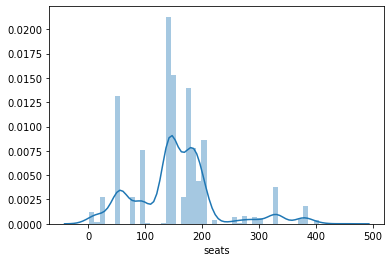

In [3]:
sns.distplot(planes['seats'])

You can see that the default plot overlays a density plot (the line) on a histogram (the bars).

You can hide one or the other by setting the `hist` or `kde` (kernel density estimate) argument to `False`.

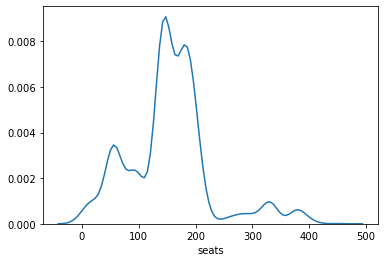

In [4]:
# Density plot only
sns.distplot(planes['seats'], hist=False)

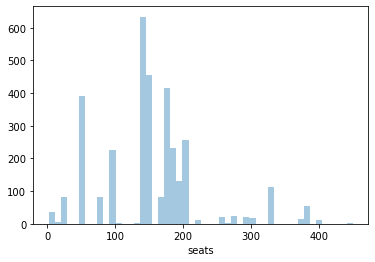

In [5]:
# Histogram plot only
sns.distplot(planes['seats'], kde=False)

`distplot`, like all Seaborn plotting functions, supports a wide variety of customizations using various arguments;
in today's training, we won't cover those, but refer to the [Seaborn docs](https://seaborn.pydata.org) to learn more.

Should you prefer a boxplot, use the `boxplot` function.

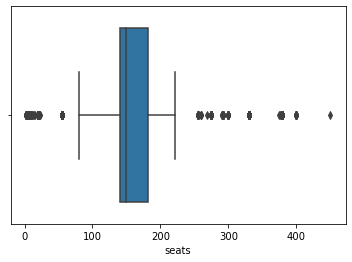

In [6]:
sns.boxplot(planes['seats'])

Or a violin plot:

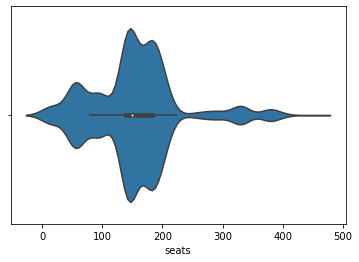

In [7]:
sns.violinplot(planes['seats'])

#### Scatter Plots

Scatter plots are used to see the relationship between two variables.
They plot one variable on the x-axis and another on the y-axis, and use points to show where the records of the data occur.

Seaborn provides the `scatterplot` function for making scatterplots.
Simply pass in two columns of data –- the first will be your x-axis and the second your y-axis.

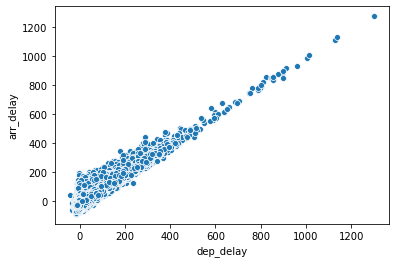

In [8]:
sns.scatterplot(flights['dep_delay'], flights['arr_delay'])

Adding a `hue` argument allows you to color points differently based on a categorical variable.

/Users/eswan18/anaconda3/envs/uc-python/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


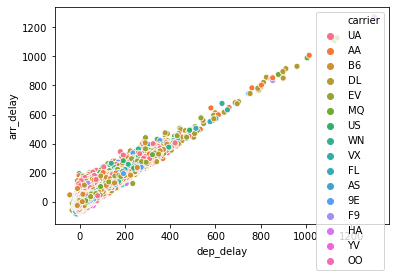

In [9]:
sns.scatterplot(flights['dep_delay'], flights['arr_delay'], hue=flights['carrier'])

This plot may take a while to render when you run it -- there are a *lot* of flights in our data, and it takes Python a while to assign them all coordinates and colors.

#### Line Plots

Line plot are useful for observing the change in a value over time.
We can use Seaborn's `lineplot` function to see how departure delay changes throughout the day.

In [10]:
## You can ignore this wrangling if you want.

# Subset our data to just one day.
cond = (flights['year'] == 2013) & (flights['month'] == 1) & (flights['day'] == 1)
jan1_flights = flights[cond]
# Group by time and get the mean delay.
jan1_flights = jan1_flights.groupby('dep_time', as_index=False)['dep_delay'].mean()
jan1_flights.head()

,dep_time,dep_delay
0,517.0,2.0
1,533.0,4.0
2,542.0,2.0
3,544.0,-1.0
4,554.0,-5.0


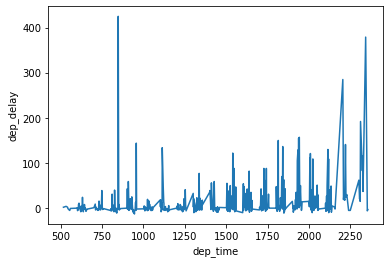

In [11]:
# Make a line plot with dep_time on the x-axis and dep_delay on the y-axis.
sns.lineplot(jan1_flights['dep_time'], jan1_flights['dep_delay'])

#### Bar Plots

Bar plots are often used to display values across several groups.
Seaborn supports them with the `barplot` function.

Let's plot the number of flights from each origin airport.

In [12]:
# Get the number of flights from each origin
flight_counts = flights.groupby('origin', as_index=False)['flight'].count()
flight_counts = flight_counts.rename(columns={'flight': 'n_flights'})
flight_counts

,origin,n_flights
0,EWR,120835
1,JFK,111279
2,LGA,104662


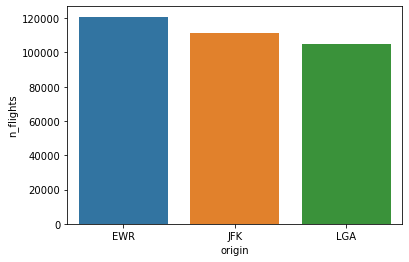

In [13]:
sns.barplot(flight_counts['origin'], flight_counts['n_flights'])

If the `hue` argument is also specified, you get a grouped bar chart -- the second argument is the groups and the `hue` argument is the bars within each group.

In [14]:
# This time, get flights by origin and carrier
flight_counts = flights.groupby(['origin', 'carrier'], as_index=False)['flight'].count()
flight_counts = flight_counts.rename(columns={'flight': 'n_flights'})
# For simplicity, let's narrow down to just a few carriers.
flight_counts = flight_counts[flight_counts['carrier'].isin(['AA', 'B6', '9E'])]
flight_counts

,origin,carrier,n_flights
0,EWR,9E,1268
1,EWR,AA,3487
3,EWR,B6,6557
12,JFK,9E,14651
13,JFK,AA,13783
14,JFK,B6,42076
22,LGA,9E,2541
23,LGA,AA,15459
24,LGA,B6,6002


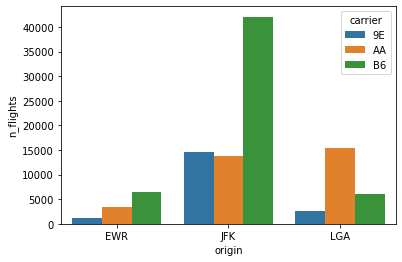

In [15]:
sns.barplot(flight_counts['origin'], flight_counts['n_flights'], hue=flight_counts['carrier'])

#### Suppressing `<matplotlib.axes...>`

You may have noticed that the above plots all have a line like `<matplotlib.axes._subplots.AxesSubplot at 0x11e22e6d8>` before the charts.
This may look like gibberish, but it's actually a reference to the object in which the plot is stored.

More importantly, it can be removed easily -- simply add a semicolon at the end of the last line in the cell.

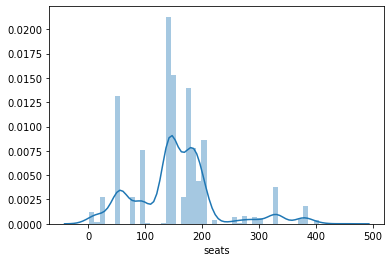

In [16]:
sns.distplot(planes['seats'])

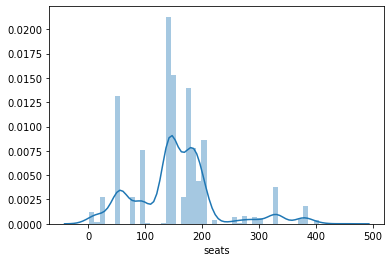

In [17]:
sns.distplot(planes['seats']);

No more gibberish!

#### Titles and Axis Labels

The plots we've created above are functional but lack the nice touches we'd want in a graphic we were planning to share.

Seaborn allows users to add a custom title and override the default axis labels with the `set_title`, `set_xlabel`, and `set_ylabel` methods.
To use them, you must first store your plot in a variable -- something we haven't done before.

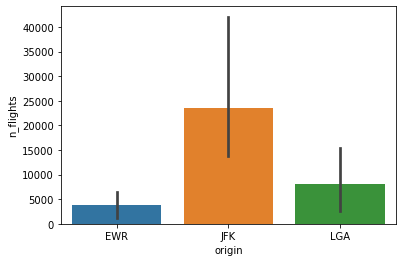

In [18]:
# Notice that the plot still renders even if we store it in a variable.
myplot = sns.barplot(flight_counts['origin'], flight_counts['n_flights'])

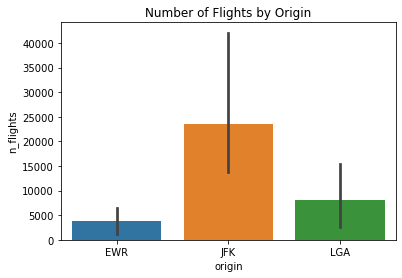

In [19]:
myplot = sns.barplot(flight_counts['origin'], flight_counts['n_flights'])
# Remember semicolons on the last line of the cell
myplot.set_title('Number of Flights by Origin');

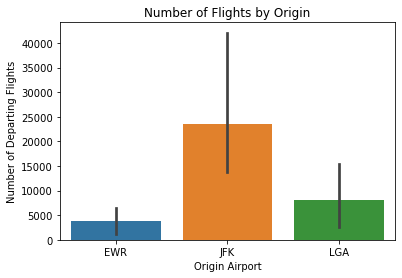

In [20]:
myplot = sns.barplot(flight_counts['origin'], flight_counts['n_flights'])
myplot.set_title('Number of Flights by Origin')
myplot.set_xlabel('Origin Airport')
# Remember semicolons on the last line of the cell
myplot.set_ylabel('Number of Departing Flights');

The creation of the plot (with `sns.plot()`) and the title and axis customization **must be done in the same cell**.
Making the plot and storing it in a variable to be used in another cell will not work.

Additionally, if you are familiar with *method chaining*, you may be inclined to string the `set_***()` calls together like so:

```python
myplot.set_title('Title').set_xlabel('X Label').set_ylabel('Y Label')
```

But **this also will not work**. These methods don't return a plot object, so chaining them fails.

If this terminology is unfamiliar to you, don't worry about it.

<font class="your_turn">
    Your Turn
</font>

You've now seen many types of plots.
Using the flights data, make 3 different graphics to explore relationships or distributions that you think might be interesting.

If you have extra time, you can try to customize your plot with axis labels, titles, and more –- take a look at the documentation using the question mark syntax we saw at the beginning of the day (e.g. `sns.barplot?`).

## Other Plotting Libraries
Unfortunately we don't have time to venture further into the Python data visualization ecosystem, but we want to provide you some background on other tools you are likely to hear about.

- **Altair** - A library with syntax focused on the famous "Grammar of Graphics", much like R's ggplot2. Converts the user's Python code into JavaScript, so adding interactivity is easy and it can be viewed in any browser. Ethan's favorite plotting package (even over Seaborn).

- **Bokeh** - Similar to Altair in that it also creates graphs using JavaScript. More flexible than Altair, but at a cost of being less intuitive and more verbose.

- **Plotly** - A library that makes interactive, dashboard-like graphics easy. Created and maintained by a company of the same name. Does require a license for some features.

- **NetworkX** - A plotting library specifically for graphs (graphs in the nodes and edges sense). Built on top of Matplotlib, much like Seaborn.

- **ggplot** - A library built to replicate the famous ggplot2 from R. Unfortunately, the differences between R and Python mean that its syntax can't be quite as elegant as ggplot2's, and (as of the last time we checked) its functionality still wasn't as full as the original's.

# Questions

Are there questions before we move on?